# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ddf = pd.read_csv('diabetes_prediction_dataset.csv')
ddf

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [2]:
len(ddf.index)

100000

In [3]:
len(ddf.columns)

9

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [4]:
ddf.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


In [5]:
ddf.ndim

2

In [6]:
# The number of unique values in each column
n_unique_values = ddf.nunique()
n_unique_values

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [7]:
# Find the column with the greatest number of distinct values
# BMI is the answer and there are no ID column in dataset
most_diverse_column = n_unique_values.idxmax()
most_diverse_column

'bmi'

In [8]:
# Sort the columns based on the number of unique values
# Second best is age
sorted_columns = n_unique_values.sort_values(ascending=False)
sorted_columns

bmi                    4247
age                     102
HbA1c_level              18
blood_glucose_level      18
smoking_history           6
gender                    3
hypertension              2
heart_disease             2
diabetes                  2
dtype: int64

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [9]:
# Identify whether all values in each column are the same or not.
for col in ddf.columns:
    ccol = ddf[col][0]
    msg = f"All values are equal in column {col} -> {ccol}" if (ddf[col] == ccol).all() else f"All values are not equal in column {col}"
    print(msg)

All values are not equal in column gender
All values are not equal in column age
All values are not equal in column hypertension
All values are not equal in column heart_disease
All values are not equal in column smoking_history
All values are not equal in column bmi
All values are not equal in column HbA1c_level
All values are not equal in column blood_glucose_level
All values are not equal in column diabetes


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

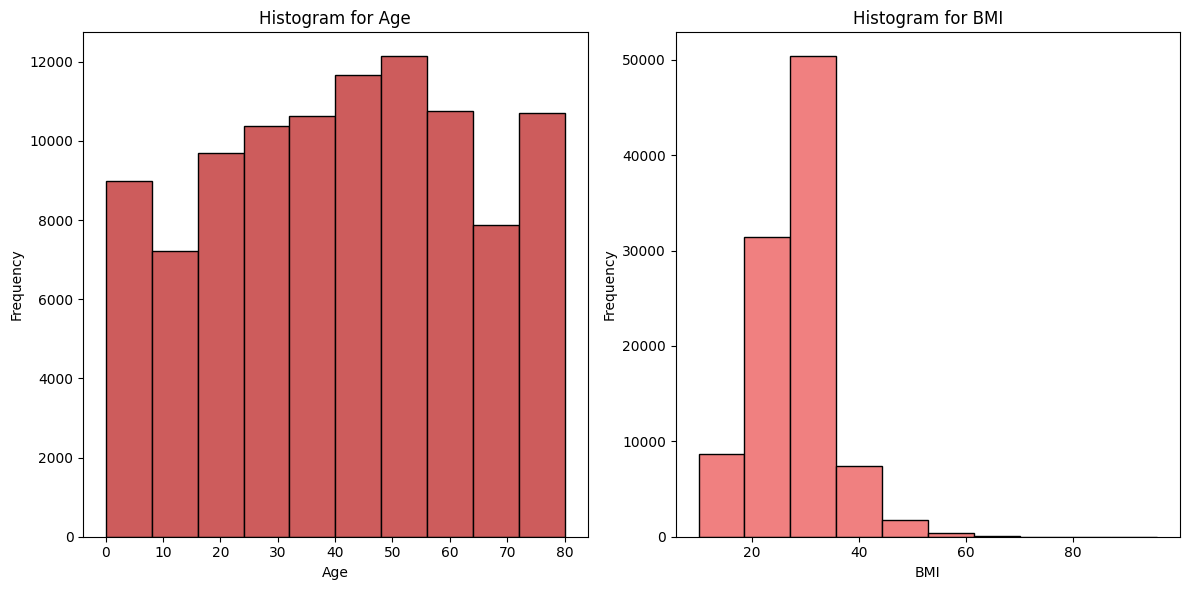

In [10]:
import seaborn as sns

# Figure for 'age' and 'bmi'
plt.figure(figsize=(12, 6))

# Histogram for 'age'
# We observe that the dataset has age raged from 0 to 80
plt.subplot(1, 2, 1)
plt.hist(ddf['age'], bins=10, color='indianred', edgecolor='black')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for 'bmi'
# We observe that most of the BMI values are from 20 to 35
plt.subplot(1, 2, 2)
plt.hist(ddf['bmi'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Histogram for BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

<ipython-input-11-a687da2afb62>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = ddf.corr()


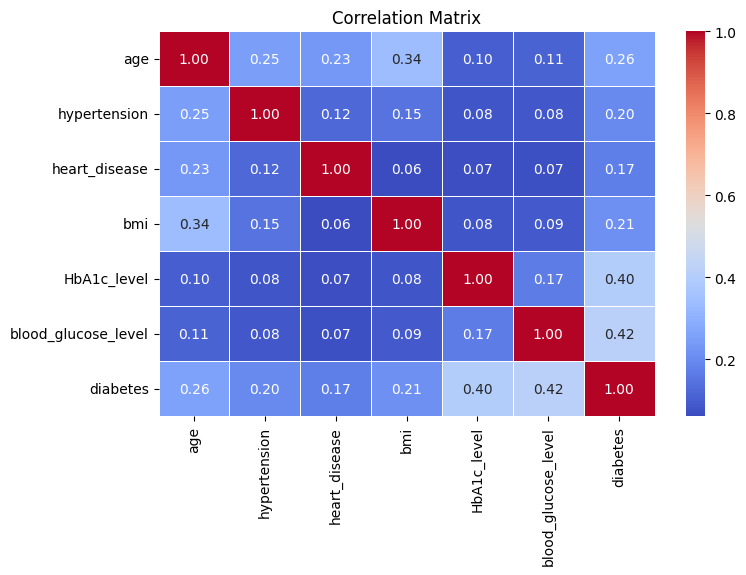

In [11]:
# Plot a heatmap of the correlation matrix
# We observe that BMI and age are highly correlating

correlation = ddf.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



---



## Submitting Your Work

Submit your work as usual.